In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [15]:
# Load the CSV file
data = pd.read_csv('F:\\CS 325 Data Mining\\Datasets\\archive\\Heart.csv')
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [16]:
X= data.iloc[:,1:14]
Y= data.iloc[:,-1]
data['ChestPain'].replace(['typical', 'nontypical', 'nonanginal', 'asymptomatic'], [1,2,3,4], inplace=True)
data['Thal'].replace(['normal', 'fixed', 'reversable'], [1,2,3], inplace=True)
data['AHD'].replace(['No', 'Yes'], [0,1], inplace=True)
data.replace('NA', np.nan, inplace = True)
data.replace(' ', np.nan, inplace = True)
data.dropna( inplace = True, how = 'any')
data = data[data.Thal != '.']
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,2.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,1.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,3.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1.0,0


In [17]:
# Split the dataset into features (X) and labels (y)
X = data.drop('AHD', axis=1)
y = data['AHD']

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize the regression model
regressor = LinearRegression()

In [20]:
# Train the regression model
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

In [22]:
thresholds = [10, 20, 30]  # Adjust these thresholds based on your problem

In [23]:
y_pred_discrete = np.digitize(y_pred, thresholds)

In [24]:
y_test_discrete = np.digitize(y_test, thresholds)

In [25]:
confusion_matrix = pd.crosstab(y_test_discrete, y_pred_discrete, rownames=['Actual'], colnames=['Predicted'])

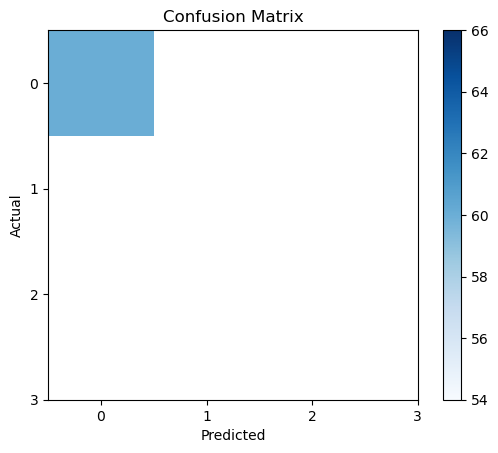

In [26]:
plt.imshow(confusion_matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(thresholds) + 1))
plt.yticks(np.arange(len(thresholds) + 1))
plt.show()

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.10283682529596032
Mean Absolute Error (MAE): 0.25919658652479566
R-squared (R2) Score: 0.5715132279334987


In [29]:
scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')

In [30]:
mse_scores = -scores

In [31]:
print("Cross-validation scores:", mse_scores)
print("Mean MSE:", mse_scores.mean())
print("Standard deviation:", mse_scores.std())

Cross-validation scores: [0.12541242 0.09851489 0.14268679 0.11985771 0.1607355 ]
Mean MSE: 0.1294414624868307
Standard deviation: 0.021067939692742274
